In [130]:
import pandas as pd
df = pd.read_csv("D:\\Datasets\\Students Performance .csv")

In [131]:
df.head()

,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,STUDENT1,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,STUDENT2,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,STUDENT3,19-22,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,STUDENT4,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,STUDENT5,19-22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [132]:
df.shape

(145, 15)

In [133]:
df.isna().sum()

Student_ID            0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           1
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

In [134]:
df.dropna(inplace = True)

In [135]:
df.isnull().sum()

Student_ID            0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

In [136]:
df.describe()

,Weekly_Study_Hours
count,144.000000
mean,2.347222
std,4.259616
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,12.000000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 144
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_ID          144 non-null    object
 1   Student_Age         144 non-null    object
 2   Sex                 144 non-null    object
 3   High_School_Type    144 non-null    object
 4   Scholarship         144 non-null    object
 5   Additional_Work     144 non-null    object
 6   Sports_activity     144 non-null    object
 7   Transportation      144 non-null    object
 8   Weekly_Study_Hours  144 non-null    int64 
 9   Attendance          144 non-null    object
 10  Reading             144 non-null    object
 11  Notes               144 non-null    object
 12  Listening_in_Class  144 non-null    object
 13  Project_work        144 non-null    object
 14  Grade               144 non-null    object
dtypes: int64(1), object(14)
memory usage: 18.0+ KB


In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [139]:
df['Sex'] = le.fit_transform(df['Sex'])

In [140]:
df['High_School_Type'] = le.fit_transform(df['High_School_Type'])

In [141]:
df['Scholarship'] = le.fit_transform(df['Scholarship'])

In [142]:
df['Additional_Work'] = le.fit_transform(df['Additional_Work'])

In [143]:
df['Sports_activity'] = le.fit_transform(df['Sports_activity'])

In [144]:
df['Transportation'] = le.fit_transform(df['Transportation'])

In [145]:
df['Attendance'] = le.fit_transform(df['Attendance'])

In [146]:
df['Reading'] = le.fit_transform(df['Reading'])
df['Notes'] = le.fit_transform(df['Notes'])
df['Listening_in_Class'] = le.fit_transform(df['Listening_in_Class'])
df['Project_work'] = le.fit_transform(df['Project_work'])

In [147]:
age_mapping = {
    '18' : 18,
    '19-22' : 20.5,
    '23-27' : 25
}

In [148]:
df['Student_Age'] = df['Student_Age'].map(age_mapping)

In [149]:
df = df.drop('Student_ID',axis=1)

In [150]:
df['Student_Age'] = df['Student_Age'].astype(int)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 144
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_Age         144 non-null    int64 
 1   Sex                 144 non-null    int64 
 2   High_School_Type    144 non-null    int64 
 3   Scholarship         144 non-null    int64 
 4   Additional_Work     144 non-null    int64 
 5   Sports_activity     144 non-null    int64 
 6   Transportation      144 non-null    int64 
 7   Weekly_Study_Hours  144 non-null    int64 
 8   Attendance          144 non-null    int64 
 9   Reading             144 non-null    int64 
 10  Notes               144 non-null    int64 
 11  Listening_in_Class  144 non-null    int64 
 12  Project_work        144 non-null    int64 
 13  Grade               144 non-null    object
dtypes: int64(13), object(1)
memory usage: 16.9+ KB


In [152]:
grade_mapping = {
    'AA': 5,
    'BA': 4.5,
    'BB': 4,
    'CB': 3.5,
    'CC': 3,
    'DC': 2.5,
    'DD': 2,
    'Fail': 0,
}
df['Grade'] = df['Grade'].map(grade_mapping)
    

In [153]:
df['Grade'] = df['Grade'].astype(int)

In [154]:
X = df.drop('Grade',axis=1)
Y = df['Grade']

In [155]:
print(Y)

0      5
1      5
2      5
3      5
4      5
      ..
140    3
141    3
142    5
143    3
144    4
Name: Grade, Length: 144, dtype: int64


In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [157]:
print(X.shape,X_train.shape,X_test.shape)

(144, 13) (115, 13) (29, 13)


In [158]:
df.Grade.unique()

array([5, 4, 3, 0, 2])

In [163]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [178]:
rfr.fit(X_train,Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [179]:
rfr.score(X_train,Y_train)

0.8721968267667475

In [180]:
rfr.score(X_test,Y_test)

-0.22024080638704113

<Axes: >

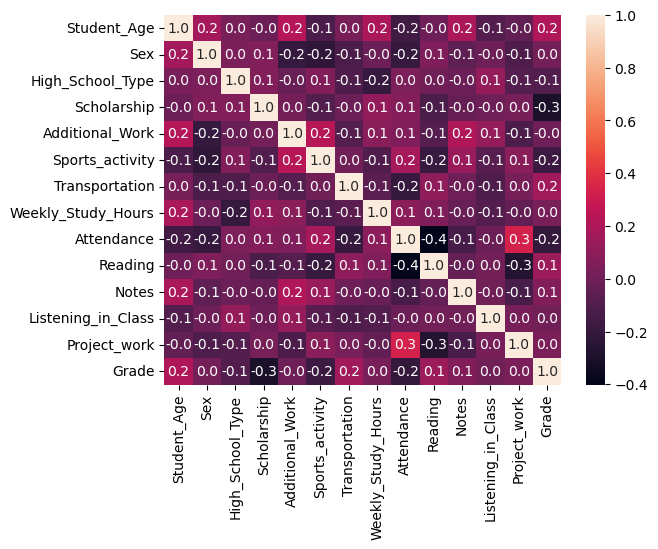

In [172]:
import seaborn as sns
correlation = df.corr()
sns.heatmap(correlation,annot=True,fmt='.1f')